In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
import keras 
from sklearn.model_selection import train_test_split

In [2]:
# Load cleaned data
df = pd.read_csv('cleaned_heart_disease_data.csv')

In [3]:
# Load scaler (if needed later for new predictions)
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

c:\Users\user\anaconda3\envs\uda\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.7.1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation
from tensorflow.keras.optimizers import Adam, SGD

# # Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# from tensorflow.keras.layers import BatchNormalization, LeakyReLU

# model = Sequential([
#     Dense(256, input_shape=(X_train.shape[1],)),
#     BatchNormalization(),
#     LeakyReLU(alpha=0.1),
#     Dropout(0.3),
#     Dense(128),
#     BatchNormalization(),
#     LeakyReLU(alpha=0.1),
#     Dropout(0.3),
#     Dense(32),
#     BatchNormalization(),
#     LeakyReLU(alpha=0.1),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')
# ])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\user\anaconda3\envs\uda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,921 (163.75 KB)

 Trainable params: 41,921 (163.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=45, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=32, callbacks=[early_stop])

Epoch 1/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5761 - loss: 0.6847 - val_accuracy: 0.5598 - val_loss: 0.6871
Epoch 2/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5571 - loss: 0.6788 - val_accuracy: 0.6413 - val_loss: 0.6659
Epoch 3/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5720 - loss: 0.6743 - val_accuracy: 0.6902 - val_loss: 0.6469
Epoch 4/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6196 - loss: 0.6497 - val_accuracy: 0.7011 - val_loss: 0.6302
Epoch 5/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6576 - loss: 0.6333 - val_accuracy: 0.7228 - val_loss: 0.6143
Epoch 6/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6902 - loss: 0.6142 - val_accuracy: 0.7228 - val_loss: 0.5994
Epoch 7/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7011 - loss: 0.6041 - val_accuracy: 0.7500 - val_loss: 0.5863
Epoch 8/500
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7038 - loss: 0.5915 - val_accuracy: 0.7717 - 

In [9]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8315 - loss: 0.3973 


[0.39728662371635437, 0.83152174949646]

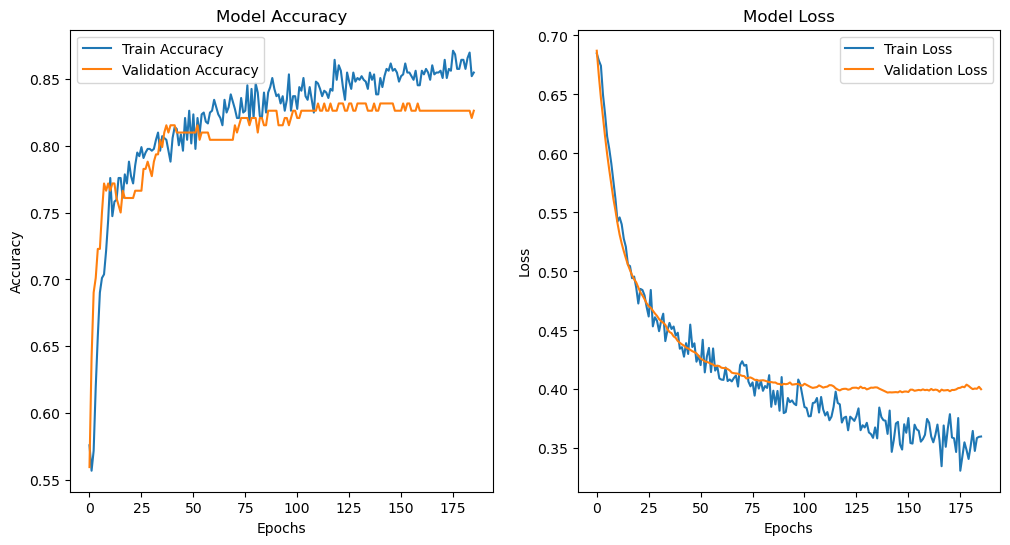

In [10]:
#plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
              precision    recall  f1-score   support

           0       0.85      0.76      0.80        82
           1       0.82      0.89      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184



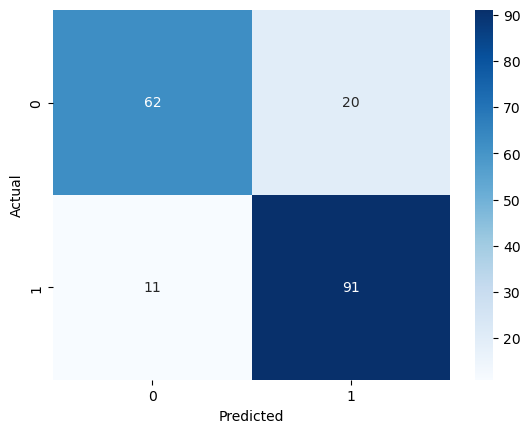

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Save model
model.save('heart_disease_model.keras')

## Try to Optmize the model 

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def create_model(trial):
    model = Sequential()
    input_dim = X_train.shape[1]

    # عدد الطبقات: 1 إلى 4
    n_layers = trial.suggest_int('n_layers', 1, 4)

    for i in range(n_layers):
        # عدد الوحدات في الطبقة (اختيار من قائمة)
        num_units = trial.suggest_categorical(f'n_units_l{i}', [32, 64, 128, 256])

        # إضافة طبقة Dense
        if i == 0:
            model.add(Dense(num_units, input_dim=input_dim))
        else:
            model.add(Dense(num_units))

        # Batch Normalization
        model.add(BatchNormalization())

        # اختيار نوع التفعيل
        activation_choice = trial.suggest_categorical(f'activation_l{i}', ['relu', 'tanh', 'leaky_relu'])
        if activation_choice == 'relu':
            model.add(Activation('relu'))
        elif activation_choice == 'tanh':
            model.add(Activation('tanh'))
        elif activation_choice == 'leaky_relu':
            model.add(LeakyReLU())

        # Dropout
        dropout_rate = trial.suggest_float(f'dropout_l{i}', 0.1, 0.65, step=0.05)
        model.add(Dropout(dropout_rate))

    # طبقة الإخراج
    model.add(Dense(1, activation='sigmoid'))

    # اختيار معدل التعلم
    lr = trial.suggest_float('lr', 1e-5, 1e-2, log=True)
    optimizer = Adam(learning_rate=lr)

    # تجميع النموذج
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [14]:
def objective(trial):
    model = create_model(trial)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    # Evaluate on validation data
    score = model.evaluate(X_test, y_test, verbose=0)
    val_loss = score[0]

    return val_loss

## use `optuna` which is python libary use to find the best hyper parameters see this: optuna_use:[Optuna Tutorial Video](https://www.youtube.com/watch?v=AidFTOdGNFQ)


In [15]:
import optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  


[I 2025-08-12 15:40:35,601] A new study created in memory with name: no-name-af067c48-d8b0-45f4-b3d5-b7d41e4ddbc5
c:\Users\user\anaconda3\envs\uda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-08-12 15:40:55,001] Trial 0 finished with value: 0.5584686398506165 and parameters: {'n_layers': 4, 'n_units_l0': 128, 'activation_l0': 'leaky_relu', 'dropout_l0': 0.4, 'n_units_l1': 128, 'activation_l1': 'relu', 'dropout_l1': 0.65, 'n_units_l2': 64, 'activation_l2': 'relu', 'dropout_l2': 0.5, 'n_units_l3': 32, 'activation_l3': 'relu', 'dropout_l3': 0.1, 'lr': 2.883256901179749e-05}. Best is trial 0 with value: 0.5584686398506165.
c:\Users\user\anaconda3\envs\uda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do

In [16]:
print("Best trial:")
trial = study.best_trial



Best trial:


In [17]:
print(f"  Value: {trial.value}")


  Value: 0.3588390052318573


In [18]:
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")



  Params: 
    n_layers: 1
    n_units_l0: 32
    activation_l0: tanh
    dropout_l0: 0.15000000000000002
    lr: 0.0033296080278741986


In [19]:
# تقدر تحجز النموذج الأفضل الآن للتدريب الكامل
best_model = create_model(study.best_trial)
best_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# حفظ النموذج
best_model.save('heart_disease_model_optuna.keras')

Epoch 1/50


c:\Users\user\anaconda3\envs\uda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5408 - loss: 0.7274
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.4714 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7908 - loss: 0.4365 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.4271 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8139 - loss: 0.4226 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8207 - loss: 0.4108 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8111 - loss: 0.4171 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8139 - loss: 0.4112 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8179 - loss: 0.4068 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8261 - loss: 0.4097 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8302 - loss: 0.3977 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8288 - los

In [20]:
from keras.models import load_model
model = load_model('heart_disease_model_optuna.keras')

# Evaluate the best model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")  


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8207 - loss: 0.4101  
Test Loss: 0.41005823016166687, Test Accuracy: 0.820652186870575


## Try Oversample the train data 

In [21]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

r = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = r.fit_resample(X_train, y_train)
print("\nClass distribution after RandomOverSampler (on training data):")
from collections import Counter
print(Counter(y_train_resampled))


Class distribution after RandomOverSampler (on training data):
Counter({1: 407, 0: 407})


In [25]:
def create_model_train():

    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [31]:
model = create_model_train()
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=250, batch_size=32)

Epoch 1/250


c:\Users\user\anaconda3\envs\uda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5258 - loss: 0.6933 - val_accuracy: 0.6793 - val_loss: 0.6680
Epoch 2/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5971 - loss: 0.6734 - val_accuracy: 0.7174 - val_loss: 0.6496
Epoch 3/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6192 - loss: 0.6581 - val_accuracy: 0.7283 - val_loss: 0.6319
Epoch 4/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6609 - loss: 0.6355 - val_accuracy: 0.7500 - val_loss: 0.6158
Epoch 5/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6781 - loss: 0.6204 - val_accuracy: 0.7663 - val_loss: 0.6010
Epoch 6/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7064 - loss: 0.6092 - val_accuracy: 0.7609 - val_loss: 0.5842
Epoch 7/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7101 - loss: 0.6002 - val_accuracy: 0.7663 - val_loss: 0.5718
Epoch 8/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7396 - loss: 0.5806 - val_accuracy: 0.7717 - val_loss: 0.

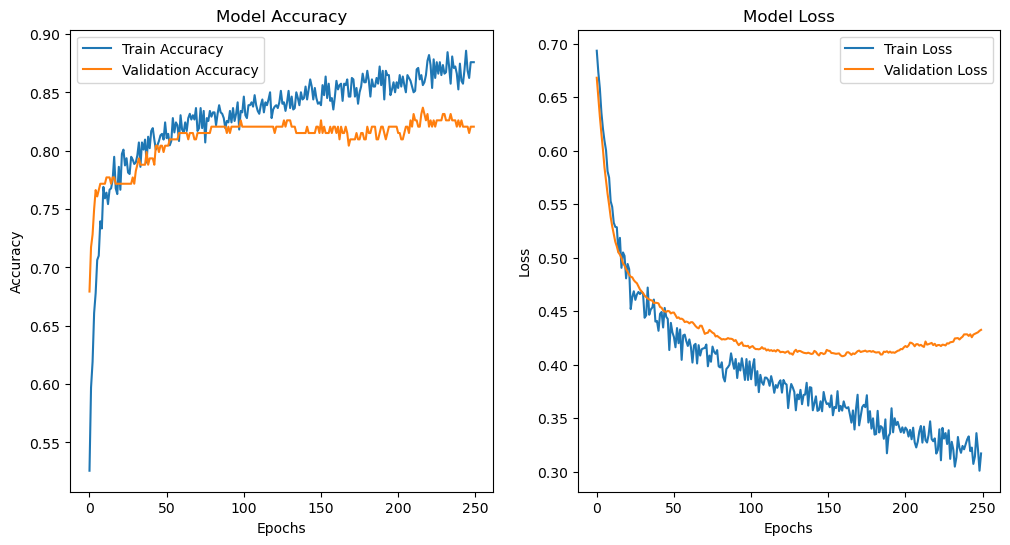

In [32]:
def make_plots(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

make_plots(history)



In [27]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\nClass distribution after SMOTE (on training data):")
print(Counter(y_train_resampled))


Class distribution after SMOTE (on training data):
Counter({1: 407, 0: 407})


In [33]:
model = create_model_train()
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=250, batch_size=32)

Epoch 1/250


c:\Users\user\anaconda3\envs\uda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5160 - loss: 0.6936 - val_accuracy: 0.6467 - val_loss: 0.6652
Epoch 2/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5725 - loss: 0.6744 - val_accuracy: 0.7446 - val_loss: 0.6527
Epoch 3/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5934 - loss: 0.6627 - val_accuracy: 0.7609 - val_loss: 0.6390
Epoch 4/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6486 - loss: 0.6420 - val_accuracy: 0.7663 - val_loss: 0.6252
Epoch 5/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6437 - loss: 0.6346 - val_accuracy: 0.7554 - val_loss: 0.6128
Epoch 6/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6953 - loss: 0.6099 - val_accuracy: 0.7663 - val_loss: 0.6001
Epoch 7/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6953 - loss: 0.6100 - val_accuracy: 0.7609 - val_loss: 0.5879
Epoch 8/250
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6990 - loss: 0.5960 - val_accuracy: 0.7554 - val_loss: 0.

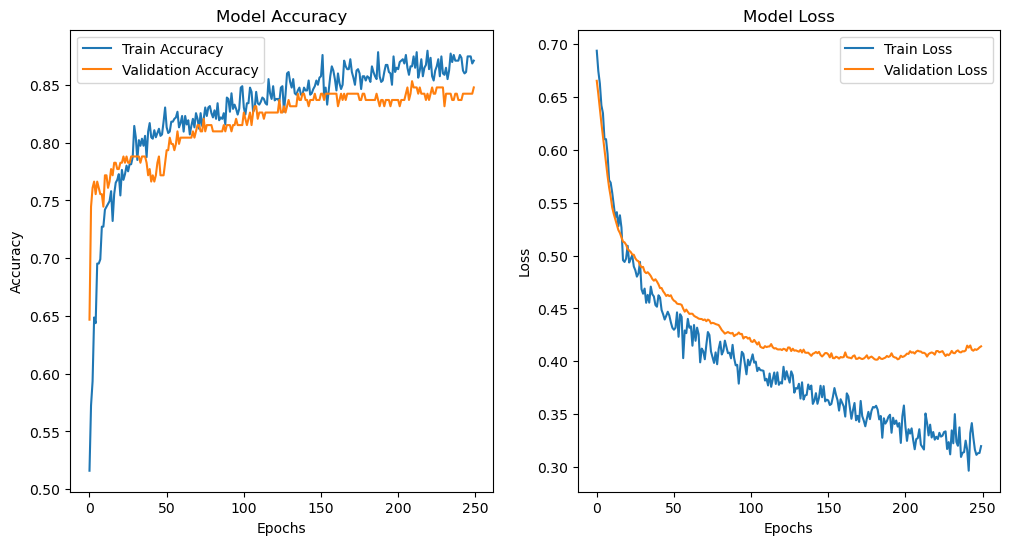

In [34]:
make_plots(history)

In [35]:
model.save('heart_disease_model_smote.keras')

In [36]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8478 - loss: 0.4141  


[0.4141239523887634, 0.8478260636329651]